In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import fastcluster
from sklearn.metrics.pairwise import pairwise_distances
import seaborn as sns
import scipy.spatial as sp
import scipy.cluster.hierarchy as hc

from ete3 import NCBITaxa
ncbi = NCBITaxa()

# Load the OG DataFrame

In [2]:
#Root_OG_Counts = pd.read_csv("../Data/output/AllOFOG&eOGCounts.csv", index_col = 0)
Root_OG_Counts = pd.read_pickle("../Data/output/AllOFOG&eOGCounts.pkl")
Root_OG_Counts

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,OG0000000.UP000070043_KXH69883.1,2850.Phatr51727,5.000000e-39,139.0,"KOG0084@1|root,KOG0084@2759|Eukaryota,2XFBC@28...",2836|Bacillariophyta,U,"Ras of Complex, Roc, domain of DAPkinase",-,-,...,ko:K07874,"ko05134,map05134",-,-,-,"ko00000,ko00001,ko04031,ko04131,ko04147",-,-,-,Ras
1,OG0000001.UP000070043_KXH70011.1,1219084.AP014508_gene646,2.010000e-76,237.0,"COG1136@1|root,COG1136@2|Bacteria,2GCNV@200918...",200918|Thermotogae,P,PFAM ABC transporter,-,-,...,"ko:K02003,ko:K02004",-,M00258,-,-,"ko00000,ko00002,ko02000",3.A.1,-,-,ABC_tran
2,OG0000003.UP000070043_KXH69724.1,269797.Mbar_A3370,1.680000e-64,212.0,"COG1131@1|root,arCOG00194@2157|Archaea,2XT0T@2...",224756|Methanomicrobia,V,ATPases associated with a variety of cellular ...,-,-,...,ko:K01990,-,M00254,-,-,"ko00000,ko00002,ko02000",3.A.1,-,-,"ABC_tran,DUF4162"
3,OG0000005.UP000070043_KXH70652.1,1341151.ASZU01000004_gene113,7.240000e-92,277.0,"COG1028@1|root,COG1028@2|Bacteria,1TP76@1239|F...",91061|Bacilli,IQ,KR domain,fabG,"GO:0000166,GO:0003674,GO:0003824,GO:0004312,GO...",...,ko:K00059,"ko00061,ko00333,ko00780,ko01040,ko01100,ko0113...","M00083,M00572","R04533,R04534,R04536,R04543,R04566,R04953,R049...","RC00029,RC00117","ko00000,ko00001,ko00002,ko01000,ko01004",-,-,iYO844.BSU15910,adh_short_C2
4,OG0000006.UP000070043_KXH69729.1,555079.Toce_0383,1.820000e-149,453.0,"COG2414@1|root,COG2414@2|Bacteria,1TPT9@1239|F...",186801|Clostridia,C,Aldehyde ferredoxin oxidoreductase,-,-,...,ko:K03738,"ko00030,ko01100,ko01120,ko01200,map00030,map01...",M00309,R08571,RC00242,"ko00000,ko00001,ko00002,ko01000",-,-,-,"AFOR_C,AFOR_N"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,OG0010442.UP000771954_MBY8985038.1,439235.Dalk_0125,6.450000e-148,451.0,"COG2006@1|root,COG2006@2|Bacteria",2|Bacteria,U,"4fe-4S ferredoxin, iron-sulfur binding domain ...",-,-,...,-,-,-,-,-,-,-,-,-,"CBM9_1,CBM9_2,DUF362"
2281,OG0010449.UP000771954_MBY8985756.1,1297617.JPJD01000050_gene1939,5.610000e-78,248.0,"COG1250@1|root,COG1250@2|Bacteria,1TPJS@1239|F...",186801|Clostridia,I,"3-hydroxyacyl-CoA dehydrogenase, C-terminal do...",-,-,...,ko:K00074,"ko00360,ko00362,ko00650,ko01100,ko01120,map003...",-,"R01976,R05576,R06941","RC00029,RC00117","ko00000,ko00001,ko01000",-,-,-,"3HCDH,3HCDH_N"
2282,OG0010450.UP000771954_MBY8985956.1,161934.XP_010673669.1,3.450000e-20,91.3,"COG0451@1|root,KOG1502@2759|Eukaryota,37J0J@33...",35493|Streptophyta,V,cinnamoyl-CoA reductase 1-like,CAD,-,...,-,-,-,-,-,-,-,-,-,"3Beta_HSD,Epimerase"
2283,OG0010452.UP000771954_MBY8986098.1,351160.RCIX168,6.950000e-90,274.0,"arCOG02290@1|root,arCOG02290@2157|Archaea",2157|Archaea,S,"Uncharacterised ArCR, COG2043",-,-,...,-,-,-,-,-,-,-,-,-,DUF169


# By Genus

In [14]:
Taxonomy = pd.DataFrame(index = Root_OG_Counts.columns)
Taxonomy["Kingdom"] = "NaN"
Taxonomy["Order"] = "NaN"

for ID in Taxonomy.index:
    if ID.startswith("UP"):
        Taxonomy.Kingdom[ID] = 2157
        Taxonomy.Order[ID] = 1935183
    else: 
        Taxonomy.Kingdom[ID] = ncbi.get_lineage(ID)[2]
        Taxonomy.Order[ID] = ncbi.get_lineage(ID)[3]
        
#TaxCount = pd.DataFrame(Taxonomy.groupby("Order").size())
#TaxCount["Name"] = ncbi.get_taxid_translator(TaxCount.index)
#TaxCount

TaxCount = pd.DataFrame(Taxonomy[Taxonomy.Kingdom != 2759].groupby("Order").size())
TaxCount["Name"] = ncbi.get_taxid_translator(TaxCount.index)
TaxCount

/Users/phivri/Applications/mambaforge/envs/PhyloETE/lib/python3.9/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 1046724 was translated into 2739064
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/Users/phivri/Applications/mambaforge/envs/PhyloETE/lib/python3.9/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 1104325 was translated into 1158600
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/Users/phivri/Applications/mambaforge/envs/PhyloETE/lib/python3.9/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 1118055 was translated into 33037
  warnings.warn("taxid %s was translated into %s" %(taxid, merged_conversion[taxid]))
/Users/phivri/Applications/mambaforge/envs/PhyloETE/lib/python3.9/site-packages/ete3/ncbi_taxonomy/ncbiquery.py:243: UserWarning: taxid 1121105 was translated into 1255705
  warnings.warn("taxid %s was translated into %s" %(taxi

,0,Name
Order,,
1224,1555,Pseudomonadota
2323,5,Bacteria incertae sedis
28890,120,Euryarchaeota
29547,80,Campylobacterota
32066,30,Fusobacteriota
40117,4,Nitrospirota
49928,3,unclassified Bacteria
57723,16,Acidobacteriota
68297,2,Dictyoglomota


## Discard Eukaryotes

In [15]:
Root_OG_Counts = Root_OG_Counts.loc[:,Taxonomy.Kingdom != 2759]
Root_OG_Counts

,1000565,1000569,1000570,1000588,1001240,1001530,1001585,100226,1002339,1002340,...,UP000751408,UP000760201,UP000771954,UP000775429,UP000777023,UP000825566,UP000825906,UP000826397,UP000826686,UP000826833
COG,,,,,,,,,,,,,,,,,,,,,
28H50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
28H51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
28H52,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
28H53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
28H54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
arCOG15264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
arCOG15268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
arCOG15271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Make binary & remove OrthoGroups in fewer than 5 species

{'bodies': [<matplotlib.collections.PolyCollection at 0x1c3ea9880>]}

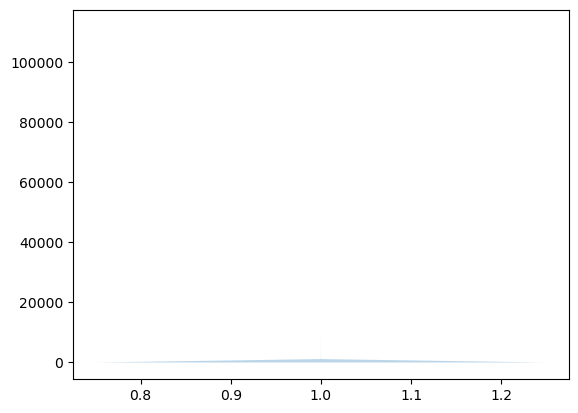

In [16]:
plt.violinplot(Root_OG_Counts.sum(axis = 1),showextrema=False)

In [17]:
RootOGs = Root_OG_Counts > 0
RootOGs = RootOGs[RootOGs.sum(axis = 1) > 10]

RootOGs

,1000565,1000569,1000570,1000588,1001240,1001530,1001585,100226,1002339,1002340,...,UP000751408,UP000760201,UP000771954,UP000775429,UP000777023,UP000825566,UP000825906,UP000826397,UP000826686,UP000826833
COG,,,,,,,,,,,,,,,,,,,,,
28H52,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28H58,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28H5A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28H5D,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28H5J,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
arCOG14922,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
arCOG14944,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
arCOG14997,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False


## Select only OGs spread over 2 or more taxonomic orders
consider: also fewer than 15

In [18]:
Order = pd.DataFrame(index = RootOGs.index, columns = Taxonomy.Order.unique())

for Ord in Taxonomy.Order.unique():
    Order[Ord] = RootOGs.loc[:,Taxonomy.Order == Ord].sum(axis = 1)

OrderBool = Order > 0

mask = OrderBool.sum(axis = 1) > 1

RootOGs = RootOGs[mask]
Order = Order[mask]

RootOGs.to_pickle("../Data/output/OGTrimmed.pkl")
Order.to_pickle("../Data/output/OGTrimmedTax.pkl")

RootOGs

,1000565,1000569,1000570,1000588,1001240,1001530,1001585,100226,1002339,1002340,...,UP000751408,UP000760201,UP000771954,UP000775429,UP000777023,UP000825566,UP000825906,UP000826397,UP000826686,UP000826833
COG,,,,,,,,,,,,,,,,,,,,,
28H52,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28H58,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28H5D,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28H5M,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28H5N,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
arCOG14808,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
arCOG14814,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
arCOG14922,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


# Compute the Jaccard pairwise distance

In [19]:
%%time
Jaccard_dist = pd.DataFrame(pairwise_distances(np.array(RootOGs), metric = "jaccard"), index=RootOGs.index, columns=RootOGs.index)
Jaccard_dist.to_pickle("../Data/output/OGJaccardDist.pkl")

Jaccard_dist

CPU times: user 6min 27s, sys: 3.68 s, total: 6min 30s
Wall time: 6min 36s


COG,28H52,28H58,28H5D,28H5M,28H5N,28H5S,28H5T,28H6M,28H6R,28H6T,...,arCOG14225,arCOG14605,arCOG14667,arCOG14672,arCOG14752,arCOG14808,arCOG14814,arCOG14922,arCOG14997,arCOG15062
COG,,,,,,,,,,,,,,,,,,,,,
28H52,0.000000,1.0,1.000000,1.000000,0.987952,0.882353,0.961883,0.990741,0.993521,0.997925,...,1.000000,1.0,1.000000,0.99322,1.000000,0.986928,1.000000,0.943820,1.000000,1.00000
28H58,1.000000,0.0,1.000000,1.000000,1.000000,0.994681,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,0.966667,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
28H5D,1.000000,1.0,0.000000,1.000000,1.000000,0.992443,0.995370,1.000000,0.995434,0.974026,...,0.992063,1.0,1.000000,1.00000,0.981481,0.995413,1.000000,0.976378,1.000000,1.00000
28H5M,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.940000,1.000000,...,1.000000,1.0,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.983871,0.96875
28H5N,0.987952,1.0,1.000000,1.000000,0.000000,0.997567,0.995614,1.000000,1.000000,0.971074,...,0.992754,1.0,0.984375,1.00000,0.984848,0.964126,0.951613,1.000000,1.000000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
arCOG14808,0.986928,1.0,0.995413,1.000000,0.964126,0.973435,0.994382,1.000000,0.931953,0.975610,...,1.000000,1.0,0.994819,1.00000,0.973822,0.000000,1.000000,1.000000,1.000000,1.00000
arCOG14814,1.000000,1.0,1.000000,1.000000,0.951613,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.0,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000
arCOG14922,0.943820,1.0,0.976378,1.000000,1.000000,0.965675,0.928287,1.000000,1.000000,0.956679,...,1.000000,1.0,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000
